<a href="https://colab.research.google.com/github/EddiRafael/Clase_desarrollo_proyectos/blob/main/Last_Mile_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [22]:
#Carga desde un archivo .csv sin indice
df= pd.read_excel('Datos limpios.xlsx') 

MODELO DE REGRESION 1

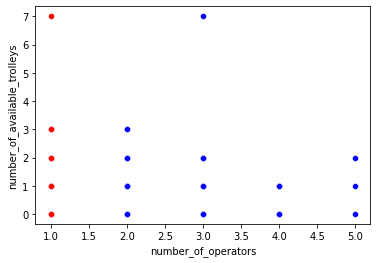

In [23]:
#Se grafican mapas de dispersión de las variables 3 variables:
from turtle import color

sns.scatterplot(x='number_of_operators', y='number_of_available_trolleys', color="blue", data=df)
sns.scatterplot(x='serving_customer', y='number_of_available_trolleys', color="red", data=df)

In [24]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['number_of_operators','serving_customer']]
Var_Dep= df['number_of_available_trolleys']

In [25]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [26]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [27]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [28]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_operators', 'serving_customer'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([0.27185228, 0.        ]),
 '_residues': array([], dtype=float64),
 'rank_': 1,
 'singular_': array([15.65534233,  0.        ]),
 'intercept_': 0.15480462415651025}

In [29]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
model.score(Vars_Indep,Var_Dep)

0.07490993145177194

MODELO PREDICTIVO 1

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['number_of_operators', 'serving_customer']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred)
df

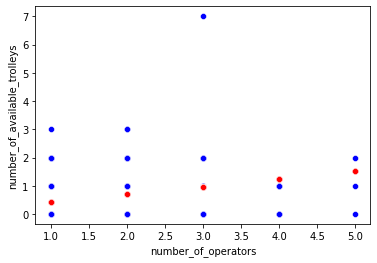

In [13]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_operators', y='number_of_available_trolleys', color="blue", data=df)
sns.scatterplot(x='number_of_operators', y='Predicciones', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [31]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.07490993145177194

In [32]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.2736967874341457